In [1]:
!pip install konlpy
!wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
!tar -xzvf /content/korean-english-park.train.tar.gz
!pip install sentencepiece

     |████████████████████████████████| 19.4MB 8.2MB/s 
     |████████████████████████████████| 460kB 57.1MB/s 
     |████████████████████████████████| 92kB 10.9MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
--2021-04-17 01:26:00--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2021-04-17 01:26:00--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 18

In [18]:
import numpy as np
import pandas as pd
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


%matplotlib inline


stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
vocab_size = 32000

def preprocess_naver_review(data):
    data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거
    # print('총 샘플의 수 :',len(data))
    # print(data.groupby('label').size().reset_index(name = 'count'))
    # print(data.isnull().values.any())
    data = data.dropna(how = 'any') # Null 값이 존재하는 행 제거
    # print(data.isnull().values.any()) # Null 값이 존재하는지 확인
    data['document'] = data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
    # print(data[:5])
    data['document'].replace('', np.nan, inplace=True)
    # print(data.isnull().sum())
    # print(data.loc[data.document.isnull()][:5])
    data = data.dropna(how = 'any')
    return data

def train_LSTM(X_train, y_train):

    model = Sequential()
    model.add(Embedding(vocab_size, 128))
    model.add(LSTM(128))
    model.add(Dense(1, activation='sigmoid'))

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
    mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

    return model, history

def show_graph(history_dict):
    # acc = history_dict['accuracy']
    acc = history_dict['acc']
    # val_acc = history_dict['val_accuracy']
    val_acc = history_dict['val_acc']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(acc) + 1)

    # "bo"는 "파란색 점"입니다
    plt.plot(epochs, loss, 'bo', label='Training loss')
    # b는 "파란 실선"입니다
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

    plt.clf()   # 그림을 초기화합니다

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()


# 데이터를 읽어봅시다.
# train_data = pd.read_table(os.getcwd()+'/ratings_train.txt')
# test_data = pd.read_table(os.getcwd()+'/ratings_test.txt')
train_data = pd.read_table('/content/drive/MyDrive/DL_Study/AIFFEL/ratings_train.txt')
test_data = pd.read_table('/content/drive/MyDrive/DL_Study/AIFFEL/ratings_test.txt')


train_data = preprocess_naver_review(train_data)
test_data = preprocess_naver_review(test_data)

print('전처리 후 훈련 샘플의 개수 :',len(train_data))
print('전처리 후 테스트용 샘플의 개수 :',len(test_data))


전처리 후 훈련 샘플의 개수 : 145791
전처리 후 테스트용 샘플의 개수 : 48995


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

In [62]:
filtered_corpus = train_data['document']
train_data.shape
# filtered_corpus[:10]

(145791, 3)

In [63]:
import sentencepiece as spm
import os
# temp_file = os.getenv('HOME')+'/aiffel/sp_tokenizer/data/korean-english-park.train.ko.temp'
temp_file = '/content/korean-english-park.train.ko.temp'
# vocab_size = 10000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

# spm.SentencePieceTrainer.Train(
#     '--input={} --model_prefix=korean_spm --vocab_size={} --pad_id=0 --bos_id=1 --eos_id=2 --unk_id=3'.format(temp_file, vocab_size)    
# )

#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.


# spm_train --input=data/train_tokenizer.txt  --model_prefix=sentencepiece/sp --vocab_size=32000 character_coverage=1.0 --model_type="unigram"

input_file = temp_file


sp_model_root='sentencepiece'
if not os.path.isdir(sp_model_root):
    os.mkdir(sp_model_root)
sp_model_name = 'tokenizer_%d' % (vocab_size)
sp_model_path = os.path.join(sp_model_root, sp_model_name)
model_type = 'unigram'  # 학습할 모델 선택, unigram이 더 성능이 좋음'bpe'
character_coverage  = 1.0  # 전체를 cover 하기 위해, default=0.9995
# user_defined_symbols = '[PAD],[UNK],[BOS],[EOS]'


input_argument = '--input=%s --model_prefix=%s --vocab_size=%s --model_type=%s --character_coverage=%s'
cmd = input_argument%(input_file, sp_model_path, vocab_size,
                      model_type, character_coverage)

spm.SentencePieceTrainer.Train(cmd)
print('train done')


train done


In [64]:
def sp_tokenize(s, corpus):

    tensor = []
    #to-do : encoding하기전에 bos, eos추가해보자

    for sen in corpus:
      # sen = '<s>'+sen+'</s>'
      # encoded_sen = s.EncodeAsIds(sen)
      # print(encoded_sen)
      tensor.append(s.EncodeAsIds(sen))

    with open(sp_model_path+".vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='pre')

    return tensor, word_index, index_word

In [65]:
import csv
vocab_list = pd.read_csv(sp_model_path+".vocab", sep='\t', header= None, quoting=csv.QUOTE_NONE)
vocab_list[:10]

,0,1
0,<unk>,0.00000
1,<s>,0.00000
2,</s>,0.00000
3,▁,-3.77802
4,▁영화,-4.32764
5,의,-4.56458
6,는,-4.73927
7,이,-4.74997
8,도,-4.75574
9,가,-4.84176


In [66]:
s = spm.SentencePieceProcessor()
# s.Load('korean_spm.model')
s.Load(sp_model_path+'.model')

True

In [67]:
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)
# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[3, 0, 5061, 9, 725, 12, 12814, 252, 16, 0]
['▁아버지가', '방', '에', '들어가', '신', '다', '.']
 ⁇ 아버지가방에들어가신다 ⁇ 


In [70]:
y_train = np.array(train_data['label'])
tensor, word_index, index_word = sp_tokenize(s, train_data['document'])


In [71]:
tensor[:2]

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,    41,   657,    19,     3, 14823,  1266],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     

In [72]:
model, history = train_LSTM(tensor, y_train)


Epoch 1/15
1944/1944 [==============================] - 65s 33ms/step - loss: 0.4732 - acc: 0.7659 - val_loss: 0.3484 - val_acc: 0.8492

Epoch 00001: val_acc improved from -inf to 0.84921, saving model to best_model.h5
Epoch 2/15
1944/1944 [==============================] - 62s 32ms/step - loss: 0.3063 - acc: 0.8696 - val_loss: 0.3209 - val_acc: 0.8618

Epoch 00002: val_acc improved from 0.84921 to 0.86179, saving model to best_model.h5
Epoch 3/15
1944/1944 [==============================] - 61s 31ms/step - loss: 0.2633 - acc: 0.8922 - val_loss: 0.3154 - val_acc: 0.8653

Epoch 00003: val_acc improved from 0.86179 to 0.86532, saving model to best_model.h5
Epoch 4/15
1944/1944 [==============================] - 61s 31ms/step - loss: 0.2322 - acc: 0.9088 - val_loss: 0.3251 - val_acc: 0.8628

Epoch 00004: val_acc did not improve from 0.86532
Epoch 5/15
1944/1944 [==============================] - 61s 31ms/step - loss: 0.2026 - acc: 0.9219 - val_loss: 0.3334 - val_acc: 0.8606

Epoch 00005: 

In [73]:
y_test = np.array(test_data['label'])
tensor, word_index, index_word = sp_tokenize(s, test_data['document'])
results = model.evaluate(tensor,  y_test, verbose=2)
print(results)

1532/1532 - 6s - loss: 0.3988 - acc: 0.8464
[0.39879700541496277, 0.846351683139801]


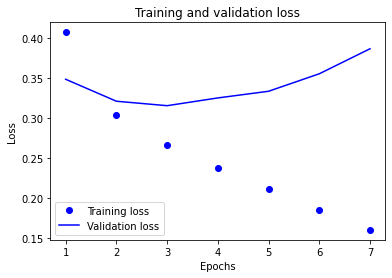

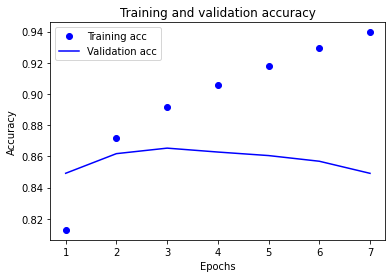

In [74]:
if history is not None:
    show_graph(history.history)

# konlpy와 비교

```
1532/1532 - 4s - loss: 0.3448 - acc: 0.8604
[0.3448282778263092, 0.8603939414024353]
```

konlpy쪽이 acc가 더 높다.

lstm모델을 타기 때문에 zero padding을 pre로 해주어야 정상동작한다.
짧은 문장의 경우 post로 해놓으면 lstm의 입력이 계속해서 0이 들어가기때문에 모델 학습이 되지 않는다.